<a href="https://colab.research.google.com/github/shaakib99/Machine-Learning/blob/gcolab/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import math

# Necessary Functions
def sigmoid(weight, data):
  z = weight[0] + weight[1] * data
  return 1/(1+ math.exp(-1 * z)) # 1/(1 + e^-z)

In [37]:
dataset = pd.read_csv('./Datasets/diabetes.csv')
featur_cols = ['Pregnancies','Outcome']
dataset = dataset[featur_cols]

iteration = 1000
weight = [0,0]

for i in range(iteration):
  j = 0

  # Logistic Regression
  for j in range(len(dataset['Outcome'])):
    hypothesis = sigmoid(weight,dataset['Pregnancies'][j])
    cost = -1 * (1/len(dataset['Outcome'])) * (dataset['Outcome'][j] * math.log(hypothesis) + (1- dataset['Outcome'][j]) * math.log(1-hypothesis))
    weight[1] -=  0.01 * (1/len(dataset['Outcome'])) * (cost) * dataset['Pregnancies'][j]
    weight[0] -= 0.01 * (1/len(dataset['Outcome'])) * (cost)
    
  # print(weight)
# print(round(sigmoid(weight,dataset['Pregnancies'][0])), dataset['Outcome'][0])

# Calculate R-Squared Value

average_hypothesis = 0 
for i in range(len(dataset['Outcome'])):
  average_hypothesis +=(1/len(dataset['Outcome'])) *  (sigmoid(weight,dataset['Pregnancies'][i]))

top = 0
bottom = 0
for i in range(len(dataset['Outcome'])):
  top += ((sigmoid(weight,dataset['Pregnancies'][i])) - average_hypothesis)**2
  bottom += (dataset['Outcome'][i] - average_hypothesis)**2


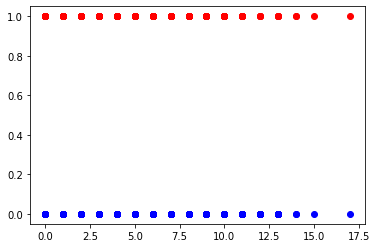

In [47]:
output = []
for i in range(len(dataset['Outcome'])):
  # print(round(sigmoid(weight,dataset['Pregnancies'][i])), dataset['Outcome'][i])
  output.append(round(sigmoid(weight,dataset['Pregnancies'][i])))
# print("R-SQUARED VALUE::::", (top/bottom)*100)
plt.scatter(dataset['Pregnancies'], dataset['Outcome'], color ="red")
plt.scatter(dataset['Pregnancies'], output, color ="blue")